In [1]:
import json
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
import os
import sys
import random
import math
import re
import time
import numpy as np
import cv2
import matplotlib
import matplotlib.pyplot as plt
import json
from skimage.io import imread, imshow, imread_collection, concatenate_images
from skimage.transform import resize
from tqdm import tqdm


# Root directory of the project
ROOT_DIR = os.path.abspath("../")

from scipy.ndimage.measurements import label

In [3]:
from PIL import Image
Image.MAX_IMAGE_PIXELS = 1000000000
Image.warnings.simplefilter('error', Image.DecompressionBombWarning)

In [4]:
# Set some parameters
IMG_WIDTH = 1800
IMG_HEIGHT = 1800
IMG_CHANNELS = 3
width_transform=1
height_transform=1

In [5]:
im_original = imread("C:/Users/jashj/Desktop/RA/Heath Comparison/V01j_resized.jpg")

In [6]:
im_original.shape

(19800, 27000, 3)

In [7]:
img=im_original.copy()

In [13]:
resize_height=int(height_transform*img.shape[0])//IMG_HEIGHT + 0
print(resize_height)

resize_width=int(width_transform*img.shape[1])//IMG_WIDTH + 0
print(resize_width)


11
15


In [18]:
X_binary = np.zeros((resize_height*1024, resize_width*1024))

In [14]:
X_binary.shape

(8192, 9216)

In [19]:
probability=99
Binary_path="Segments_1800x1800_v1j_resize_overlap_results_{}".format(probability)

In [23]:
i=0
for r in range(0,resize_height*1024-1024//2,1024//2):
    for c in range(0,resize_width*1024-1024//2,1024//2):
#         print(r,r+1024,c,c+1024)
        print(r,r+IMG_HEIGHT,c,c+IMG_WIDTH)
#         X[r:r+IMG_HEIGHT, c:c+IMG_WIDTH]
        temp = imread(Binary_path+'/{}.jpg'.format(i))
#         print(np.unique(temp))
        temp=(temp>7)*1
#         print(np.unique(temp))
        X_binary[r:r+1024,c:c+1024]=X_binary[r:r+1024,c:c+1024]+temp
        i+=1

0 1800 0 1800
[0]
0 1800 512 2312
[0]
0 1800 1024 2824
[  0   1   2   3   4   5   6 249 250 251 252 253 254 255]
0 1800 1536 3336
[  0   1   2   3   4   5   6   7   8 246 248 249 250 251 252 253 254 255]
0 1800 2048 3848
[  0   1   2   3   4   5   6   7 246 248 249 250 251 252 253 254 255]
0 1800 2560 4360
[0]
0 1800 3072 4872
[  0   1   2   3   4   5   6   7 248 249 250 251 252 253 254 255]
0 1800 3584 5384
[  0   1   2   3   4   5   6   7 249 250 251 252 253 254 255]
0 1800 4096 5896
[  0   1   2   3   4   5   6   7 249 250 251 252 253 254 255]
0 1800 4608 6408
[  0   1   2   3   4   5   6   7 249 250 251 252 253 254 255]
0 1800 5120 6920
[0]
0 1800 5632 7432
[  0   1   2   3   4   5   6 249 250 251 252 253 254 255]
0 1800 6144 7944
[0]
0 1800 6656 8456
[0]
0 1800 7168 8968
[  0   1   2   3   4   5 250 251 252 253 254 255]
0 1800 7680 9480
[  0   1   2   3   4   5   6 248 250 251 252 253 254 255]
0 1800 8192 9992
[0]
0 1800 8704 10504
[0]
0 1800 9216 11016
[0]
0 1800 9728 11528
[0]
0

3072 4872 1536 3336
[  0   1   2   3   4   5   6   7   8 248 249 250 251 252 253 254 255]
3072 4872 2048 3848
[  0   1   2   3   4   5   6   7 248 249 250 251 252 253 254 255]
3072 4872 2560 4360
[  0   1   2   3   4   5   6   7 247 248 249 250 251 252 253 254 255]
3072 4872 3072 4872
[  0   1   2   3   4   5   6   7 248 249 250 251 252 253 254 255]
3072 4872 3584 5384
[  0   1   2   3   4   5   6   7 247 248 249 250 251 252 253 254 255]
3072 4872 4096 5896
[  0   1   2   3   4   5   6   7 248 249 250 251 252 253 254 255]
3072 4872 4608 6408
[  0   1   2   3   4   5   6   7 248 249 250 251 252 253 254 255]
3072 4872 5120 6920
[  0   1   2   3   4   5   6   7 248 249 250 251 252 253 254 255]
3072 4872 5632 7432
[0]
3072 4872 6144 7944
[0]
3072 4872 6656 8456
[0]
3072 4872 7168 8968
[0]
3072 4872 7680 9480
[0]
3072 4872 8192 9992
[0]
3072 4872 8704 10504
[0]
3072 4872 9216 11016
[0]
3072 4872 9728 11528
[0]
3072 4872 10240 12040
[0]
3072 4872 10752 12552
[0]
3072 4872 11264 13064
[0]
307

[  0   1   2   3   4   5   6 248 250 251 252 253 254 255]
5632 7432 11264 13064
[  0   1   2   3   4   5   6   7 248 249 250 251 252 253 254 255]
5632 7432 11776 13576
[0]
5632 7432 12288 14088
[0]
5632 7432 12800 14600
[0]
5632 7432 13312 15112
[0]
5632 7432 13824 15624
[0]
5632 7432 14336 16136
[0]
6144 7944 0 1800
[0]
6144 7944 512 2312
[0]
6144 7944 1024 2824
[0]
6144 7944 1536 3336
[  0   1   2   3   4   5   6   7 248 249 250 251 252 253 254 255]
6144 7944 2048 3848
[  0   1   2   3   4   5   6   7 248 249 250 251 252 253 254 255]
6144 7944 2560 4360
[  0   1   2   3   4   5   6   7 248 249 250 251 252 253 254 255]
6144 7944 3072 4872
[  0   1   2   3   4   5   6   7   8 248 249 250 251 252 253 254 255]
6144 7944 3584 5384
[  0   1   2   3   4   5   6   7   8 248 249 250 251 252 253 254 255]
6144 7944 4096 5896
[  0   1   2   3   4   5   6   7   8 248 249 250 251 252 253 254 255]
6144 7944 4608 6408
[  0   1   2   3   4   5   6   7   8 248 249 250 251 252 253 254 255]
6144 7944 51

[  0   1   2   3   4   5   6   7 247 248 249 250 251 252 253 254 255]
8192 9992 7680 9480
[  0   1   2   3   4   5   6   7 247 248 249 250 251 252 253 254 255]
8192 9992 8192 9992
[  0   1   2   3   4   5   6   7   8 248 249 250 251 252 253 254 255]
8192 9992 8704 10504
[  0   1   2   3   4   5   6   7 248 249 250 251 252 253 254 255]
8192 9992 9216 11016
[0]
8192 9992 9728 11528
[0]
8192 9992 10240 12040
[0]
8192 9992 10752 12552
[0]
8192 9992 11264 13064
[0]
8192 9992 11776 13576
[0]
8192 9992 12288 14088
[0]
8192 9992 12800 14600
[0]
8192 9992 13312 15112
[0]
8192 9992 13824 15624
[0]
8192 9992 14336 16136
[0]
8704 10504 0 1800
[0]
8704 10504 512 2312
[0]
8704 10504 1024 2824
[0]
8704 10504 1536 3336
[0]
8704 10504 2048 3848
[0]
8704 10504 2560 4360
[0]
8704 10504 3072 4872
[0]
8704 10504 3584 5384
[  0   1   2   3   4   5   6   7 248 249 250 251 252 253 254 255]
8704 10504 4096 5896
[  0   1   2   3   4   5   6   7 248 249 250 251 252 253 254 255]
8704 10504 4608 6408
[  0   1   2 

In [24]:
np.unique(X_binary)

array([0., 1., 2., 3., 4.])

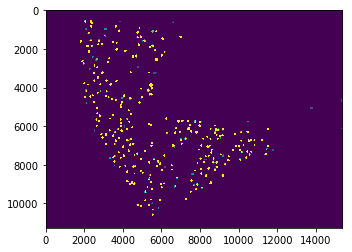

In [28]:
plt.imshow(X_binary)

In [26]:
cv2.imwrite('Binary.jpg',63*X_binary)

True

In [24]:
one=(X_binary>=1)*255
two=(X_binary>=2)*255
three=(X_binary>=3)*255
four=(X_binary>=4)*255

In [25]:
from scipy.ndimage.measurements import label
structure = np.ones((3, 3), dtype=np.int)

In [26]:
def labels(x):
    labels, ncomponents = label(x, structure)
    print(ncomponents)

In [27]:
labels(one)
labels(two)
labels(three)
labels(four)

186
162
161
153


In [36]:
one_resize = resize(one, (im_original.shape[0], im_original.shape[1]),  preserve_range=True)
two_resize = resize(two, (im_original.shape[0], im_original.shape[1]),  preserve_range=True)
three_resize = resize(three, (im_original.shape[0], im_original.shape[1]),  preserve_range=True)
four_resize = resize(four, (im_original.shape[0], im_original.shape[1]),  preserve_range=True)

In [37]:
labels(one_resize)
labels(two_resize)
labels(three_resize)
labels(four_resize)

177
162
157
150


In [38]:
print(np.unique(one_resize))
print(np.unique(two_resize))
print(np.unique(three_resize))
print(np.unique(four_resize))

[0.00000000e+00 5.42596201e-04 9.68161847e-04 ... 2.54998032e+02
 2.54998819e+02 2.55000000e+02]
[0.00000000e+00 2.23421964e-04 1.24477951e-03 ... 2.54999330e+02
 2.54999415e+02 2.55000000e+02]
[0.00000000e+00 1.88312799e-03 1.98951940e-03 ... 2.54999479e+02
 2.54999479e+02 2.55000000e+02]
[0.00000000e+00 3.72369942e-04 7.97935590e-04 ... 2.54999479e+02
 2.54999840e+02 2.55000000e+02]


In [39]:
one_resize=(one_resize>0)*255
two_resize=(two_resize>0)*255
three_resize=(three_resize>0)*255
four_resize=(four_resize>0)*255

In [40]:
print(np.unique(one_resize))
print(np.unique(two_resize))
print(np.unique(three_resize))
print(np.unique(four_resize))

[  0 255]
[  0 255]
[  0 255]
[  0 255]


In [41]:
labels(one_resize)
labels(two_resize)
labels(three_resize)
labels(four_resize)

177
162
157
150


In [42]:
cv2.imwrite('one_resize_{}.jpg'.format(probability),one_resize)
cv2.imwrite('two_resize_{}.jpg'.format(probability),two_resize)
cv2.imwrite('three_resize_{}.jpg'.format(probability),three_resize)
cv2.imwrite('four_resize_{}.jpg'.format(probability),four_resize)

True

In [23]:
Binary_mask_combined=X_binary.copy()

In [24]:
im_resize = resize(Binary_mask_combined, (im_original.shape[0], im_original.shape[1]),  preserve_range=True)


In [1]:
np.unique(im_resize)

NameError: name 'np' is not defined

In [25]:
cv2.imwrite('Binary_overlap_resized_to_original.jpg',63*im_resize)

True

In [26]:
np.unique(im_resize)

array([0.00000000e+00, 2.12782824e-06, 3.79671313e-06, ...,
       3.99999737e+00, 3.99999937e+00, 4.00000000e+00])

In [27]:
structure = np.ones((3, 3), dtype=np.int)

In [28]:
labeled_mask, ncomponents_mask = label(X_binary, structure)

In [29]:
ncomponents_mask

193

In [30]:
kernel = np.ones((5,5),np.uint8)

In [31]:
Binary_mask_combined.shape

(8192, 9216)

In [32]:
np.unique(Binary_mask_combined)

array([0., 1., 2., 3., 4.])

In [33]:
Binary_mask_combined.dtype

dtype('float64')

In [34]:
opening = cv2.morphologyEx(Binary_mask_combined.astype(np.uint8), cv2.MORPH_OPEN, kernel)

In [35]:
opening.shape

(8192, 9216)

In [36]:
np.unique(opening)

array([0, 1, 2, 3, 4], dtype=uint8)

In [37]:
opening.dtype

dtype('uint8')

In [38]:
closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel)

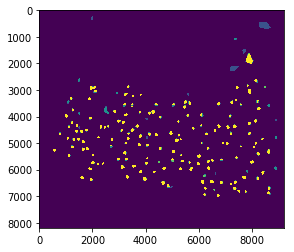

In [39]:
plt.imshow(closing)

In [40]:
np.unique(closing)

array([0, 1, 2, 3, 4], dtype=uint8)

In [41]:
labeled_closing, ncomponents_closing = label(closing, structure)

In [42]:
ncomponents_closing

178

In [43]:
cv2.imwrite('closing_binary_overlap.jpg',63*closing)

True

In [44]:
im_closing_resize = resize(closing, (im_original.shape[0], im_original.shape[1]),  preserve_range=True)


In [45]:
cv2.imwrite('binary_closing_overlap_resized_to_original.jpg',63*im_closing_resize)

True